In [4]:
# %matplotlib widget
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from matplotlib.animation import FuncAnimation
import matplotlib.colors as colors



#Part 1

In [5]:
df_x = pd.read_csv("../data/Q1/linearX.csv",header=None)
df_y = pd.read_csv("../data/Q1/linearY.csv",header = None)
df = pd.concat([df_x, df_y], axis=1)

In [6]:
x_train  = np.loadtxt("../data/Q1/linearX.csv", delimiter=",")
y_train = np.loadtxt("../data/Q1/linearY.csv", delimiter=",")

In [7]:
df.columns = ['X','Y']

In [8]:
df.describe()

,X,Y
count,1.000000e+03,1000.000000
mean,-2.000000e-07,6.218672
std,1.000000e+00,29.064923
min,-1.655800e+00,-41.919900
25%,-8.874500e-01,-19.608050
50%,-7.750000e-03,6.008850
75%,8.616250e-01,31.287950
max,1.777900e+00,57.854600


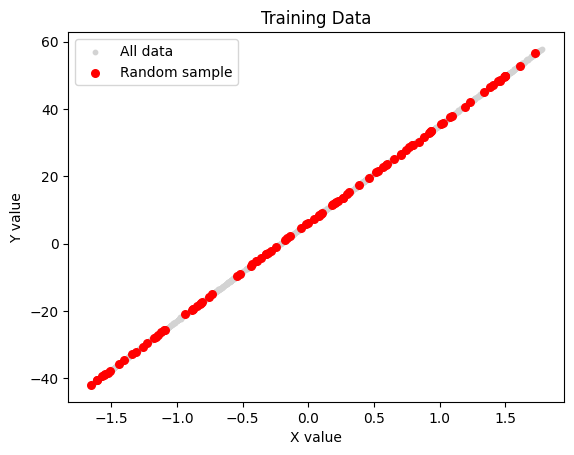

In [9]:



plt.clf() 
plt.scatter(x_train, y_train, color="lightgray", s=10, label="All data")

  
indices = np.random.choice(len(x_train), size=100, replace=False)
x_sample = x_train[indices]
y_sample = y_train[indices]

plt.scatter(x_sample, y_sample, color="red", s=30, label="Random sample")


plt.xlabel("X value")
plt.ylabel("Y value")
plt.title("Training Data")
plt.legend()
plt.show()


In [10]:
X = np.ones((2,1000))
for i in range(1000):
    X[1][i] = x_train[i]
X = X.T
B = np.zeros((1, 2))
Y = y_train.reshape(1,1000)



In [11]:
def hypothesis(X,B):
    return X@B.T
def loss_fun(X,Y,B):
    m = len(Y)
    H = hypothesis(X,B)
    error = (Y.T - H)
    return (error.T@ error )/(2*m)
    

In [12]:
def gradient_descent(alpha,conv_param,B,Y,X): 
    m = len(X)
    delta = float('inf')
    loss =  loss_fun(X,Y,B)
    cnt  = 0
    while abs(delta) >= conv_param:
        H = hypothesis(X,B)
        grad = np.dot((Y.T - H).T, X) / len(X)
        B = B + alpha * grad
        
        delta = loss - loss_fun(X,Y,B) 
        loss = loss_fun(X,Y,B)
        print(f"B = {B[0]} " , f"Loss = {loss}" ,f"Delta = {delta}")
        cnt += 1
    # print(f"B = {B[0]} " , f"Loss = {loss[0][0]}")    
    print(f"iters = {cnt}")  
    return B  
         

In [13]:
B = np.zeros((1, 2))
alpha = 0.1
convg_param = 1e-10
B = gradient_descent(alpha,convg_param,B,Y,X)
predict_y = hypothesis(X,B)

B = [0.62186722 2.90356893]  Loss = [[357528.62157514]] Delta = [[83769.81384914]]
B = [1.18154778 5.51707134]  Loss = [[289660.65312933]] Delta = [[67867.96844581]]
B = [1.68526033 7.86948487]  Loss = [[234675.91651796]] Delta = [[54984.73661137]]
B = [2.13860167 9.98689229]  Loss = [[190128.81520193]] Delta = [[44547.10131603]]
B = [ 2.54660893 11.89277072]  Loss = [[154037.99505697]] Delta = [[36090.82014496]]
B = [ 2.91381549 13.6082519 ]  Loss = [[124798.21821525]] Delta = [[29239.77684172]]
B = [ 3.24430143 15.15235652]  Loss = [[101108.96571047]] Delta = [[23689.25250478]]
B = [ 3.54173881 16.54220509]  Loss = [[81916.59333253]] Delta = [[19192.37237793]]
B = [ 3.80943248 17.7932078 ]  Loss = [[66367.46791463]] Delta = [[15549.12541791]]
B = [ 4.05035681 18.91923533]  Loss = [[53769.99966006]] Delta = [[12597.46825456]]
B = [ 4.26718873 19.93277273]  Loss = [[43563.88179253]] Delta = [[10206.11786753]]
B = [ 4.46233747 20.84505774]  Loss = [[35295.1693786]] Delta = [[8268.712413

#New Line 

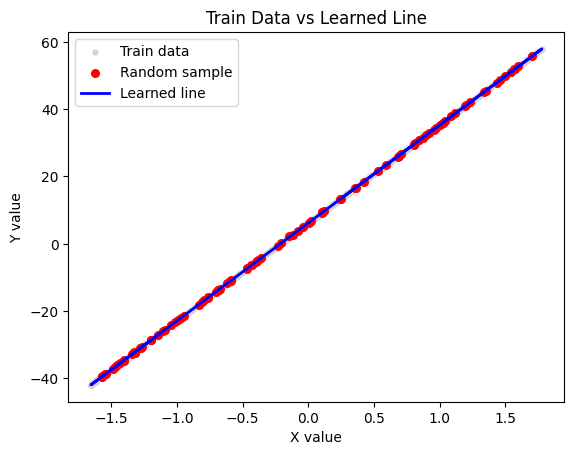

In [14]:
plt.clf()  
plt.scatter(x_train, y_train, color="lightgray", s=12, label="Train data")



indices = np.random.choice(len(x_train), size=100, replace=False)
x_sample = x_train[indices]
y_sample = y_train[indices]
plt.scatter(x_sample, y_sample, color="red", s=30, label="Random sample")

plt.plot(x_train, predict_y, color="blue", linewidth=2, label="Learned line")


plt.xlabel("X value")
plt.ylabel("Y value")
plt.title("Train Data vs Learned Line")

plt.legend()

plt.show()

#New scatter points(all)

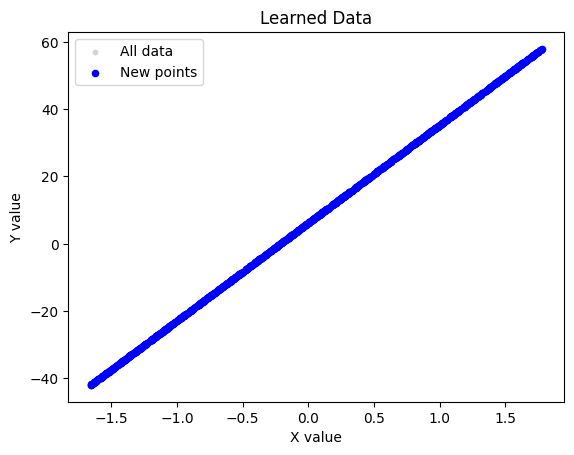

In [15]:
plt.clf()  

plt.scatter(x_train, y_train, color="lightgray", s=10, label="All data")

plt.scatter(x_train, predict_y, color="blue", s=20, label="New points")


plt.xlabel("X value")
plt.ylabel("Y value")
plt.title("Learned Data")
plt.legend()

plt.show()


#New random points 

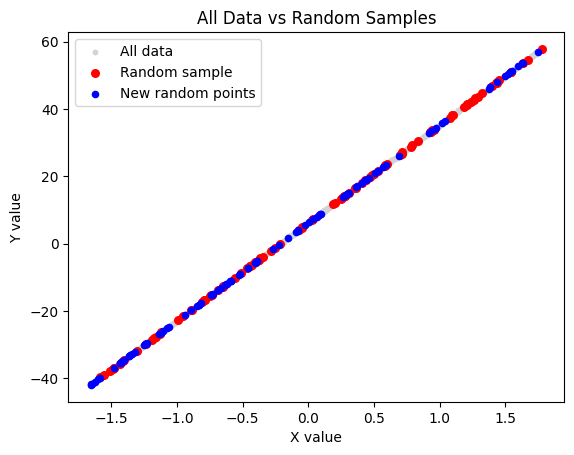

In [16]:

plt.clf()  


plt.scatter(x_train, y_train, color="lightgray", s=10, label="All data")


indices_red = np.random.choice(len(x_train), size=100, replace=False)
x_sample_red = x_train[indices_red]
y_sample_red = y_train[indices_red]
plt.scatter(x_sample_red, y_sample_red, color="red", s=30, label="Random sample")


indices_blue = np.random.choice(len(x_train) , size=100,replace = False)
x_sample_blue = x_train[indices_blue]
y_sample_blue = predict_y[indices_blue]
plt.scatter(x_sample_blue, y_sample_blue, color="blue", s=20, label="New random points")

plt.xlabel("X value")
plt.ylabel("Y value")
plt.title("All Data vs Random Samples")
plt.legend()

plt.show()


In [17]:


def gradient_descent_plot(alpha,conv_param,B,Y,X,dist): 
    m = len(X)
    delta = float('inf')
    loss =  loss_fun(X,Y,B)
    cnt  = 0
    J  = [loss[0][0]]
    B0 = [0.]
    B1 = [0.]
    while abs(delta) > conv_param:
        H = hypothesis(X,B)
          
        grad = np.dot((Y.T - H).T, X) / len(X)
        B = B + alpha * grad
        
        delta = loss - loss_fun(X,Y,B) 
        loss = loss_fun(X,Y,B)
        cnt += 1
        
        # if cnt%dist == 0  and len(J) < 50:  
        if cnt%dist == 0:     
            J.append(float(loss[0][0]))
            B0.append(float(B[0][0]))  
            B1.append(float(B[0][1])) 
            
    return J, B0, B1


def show_3d(X,Y,alpha,convg_param):
    plt.clf()
    B0_range = np.linspace(-20, 30, 200)
    B1_range = np.linspace(0, 60, 200)
    B0, B1 = np.meshgrid(B0_range, B1_range)


    Z = np.zeros_like(B0, dtype=float)
    for i in range(B0.shape[0]):
        for j in range(B0.shape[1]):
            Bb = np.array([[B0[i, j], B1[i, j]]])
            Z[i, j] = loss_fun(X, Y, Bb).item()

    dist = 1
    J_points,B0_points,B1_points = gradient_descent_plot(alpha,convg_param,np.zeros((1, 2)),Y,X,dist)

    fig = plt.figure(figsize=(10,7))
    ax = fig.add_subplot(111, projection='3d')
    surf = ax.plot_surface(B0, B1, Z, cmap="viridis", alpha=0.7, edgecolor="none")
    ax.view_init(elev=30, azim=45)
    ax.scatter(B0_points,B1_points, J_points, color='red', s=30, label="My Points")
    
    ax.set_xlabel("Thetha 0")
    ax.set_ylabel("Thetha 1")
    ax.set_zlabel("Loss")
    ax.set_title("Gradient Descent Path")
    fig.colorbar(surf, shrink=0.5, aspect=5)

    plt.show()

def show_contor(X,Y,alpha,convg_param):
    plt.clf()
    B0_range = np.linspace(-20, 30, 200)
    B1_range = np.linspace(0, 60, 200)
    B0, B1 = np.meshgrid(B0_range, B1_range)


    J = np.zeros_like(B0, dtype=float)
    for i in range(B0.shape[0]):
        for j in range(B0.shape[1]):
            Bb = np.array([[B0[i, j], B1[i, j]]])
            J[i, j] = loss_fun(X, Y, Bb).item()
    dist =1
    J_points,B0_points,B1_points = gradient_descent_plot(alpha,convg_param,np.zeros((1, 2)),Y,X,dist)
    
    plt.figure()
    plt.clf()
    contour = plt.contourf(B0, B1, J, levels=10, cmap='viridis')  
    plt.colorbar(contour, label="Error Value")
    plt.scatter(B0_points, B1_points, c='red', s=50, label="My Points")

    plt.xlabel("θ0")
    plt.ylabel("θ1")
    plt.legend()
    plt.show()

<Figure size 640x480 with 0 Axes>

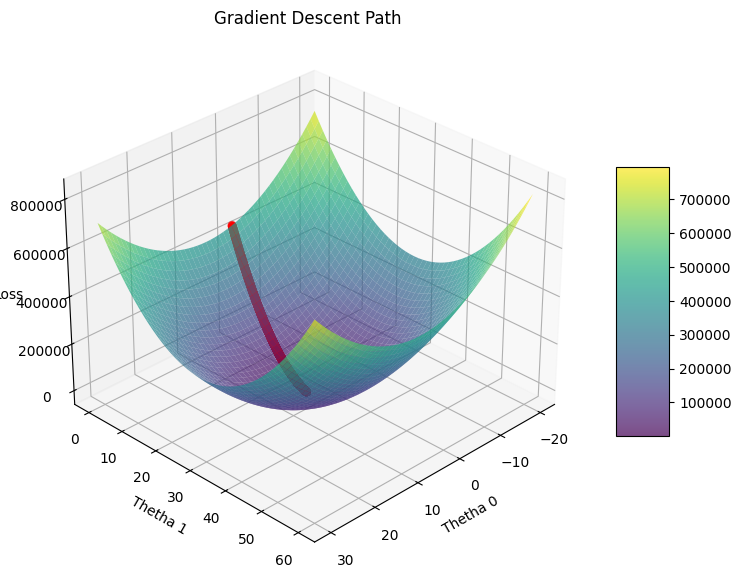

<Figure size 640x480 with 0 Axes>

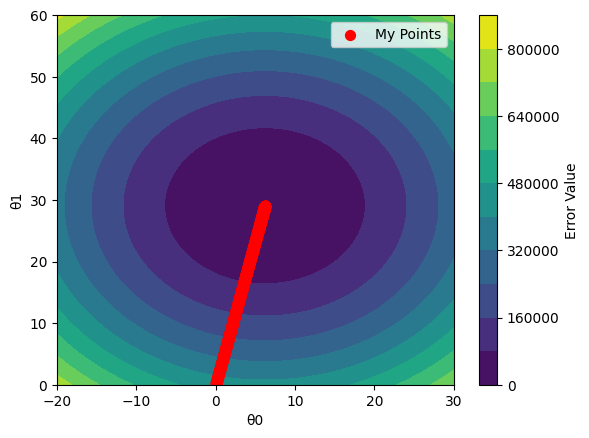

In [18]:
alpha = 0.001
convg_param = 1e-10
show_3d(X,Y,alpha,convg_param)
show_contor(X,Y,alpha,convg_param)

<Figure size 640x480 with 0 Axes>

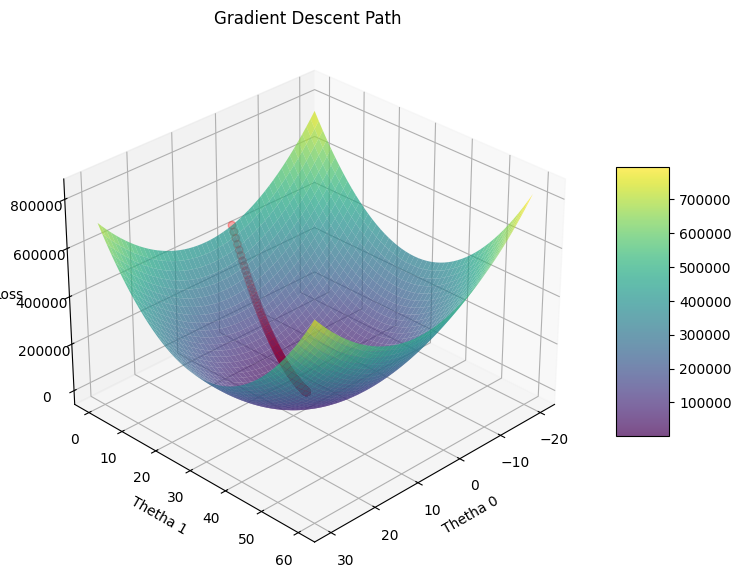

<Figure size 640x480 with 0 Axes>

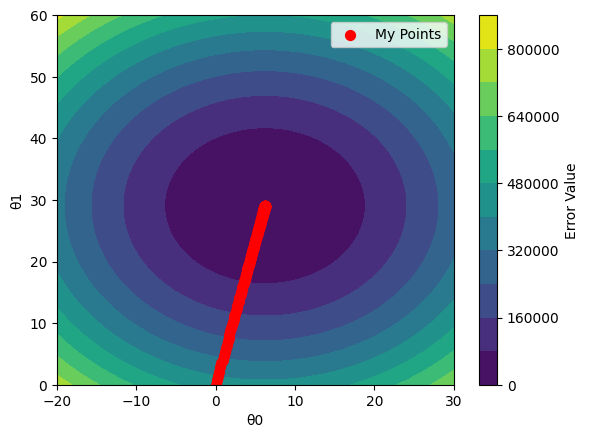

In [19]:
alpha = 0.025
convg_param = 1e-10
show_3d(X,Y,alpha,convg_param)
show_contor(X,Y,alpha,convg_param)

<Figure size 640x480 with 0 Axes>

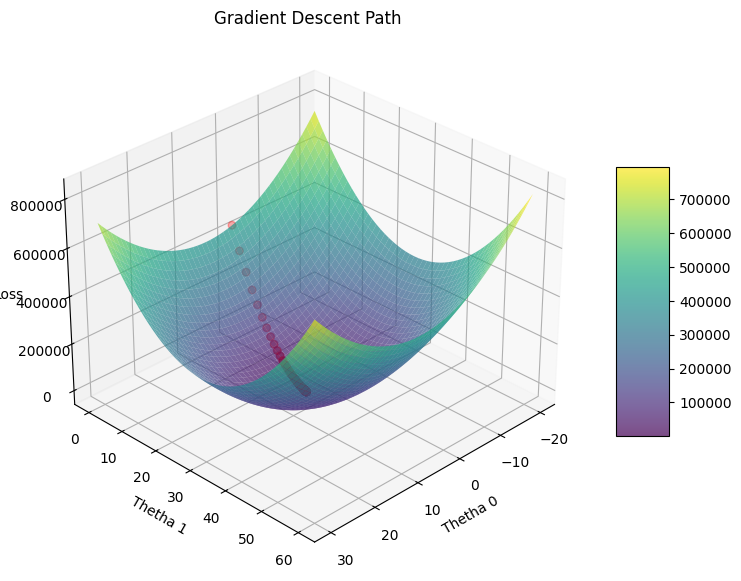

<Figure size 640x480 with 0 Axes>

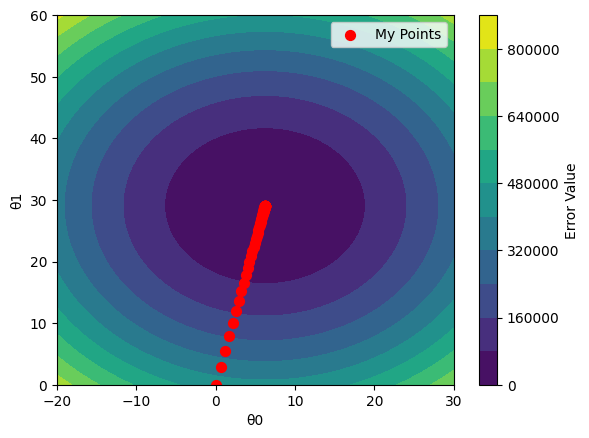

In [20]:
alpha = 0.1
convg_param = 1e-10
show_3d(X,Y,alpha,convg_param)
show_contor(X,Y,alpha,convg_param)

<Figure size 640x480 with 0 Axes>

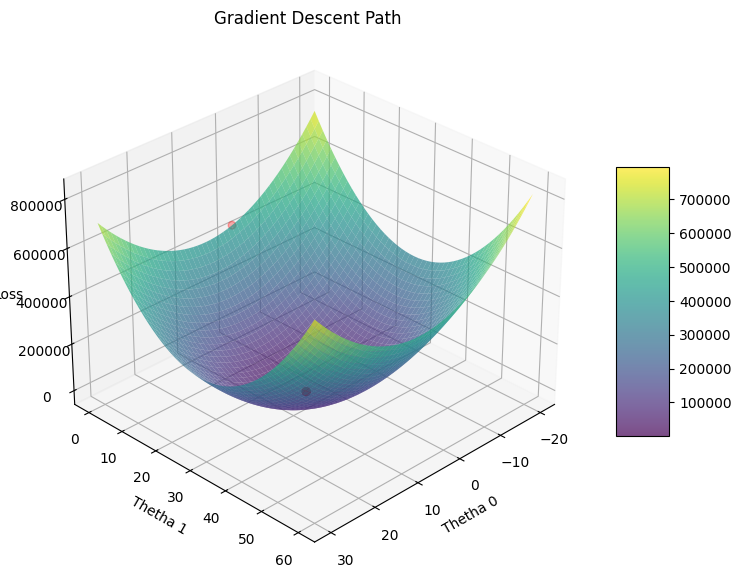

<Figure size 640x480 with 0 Axes>

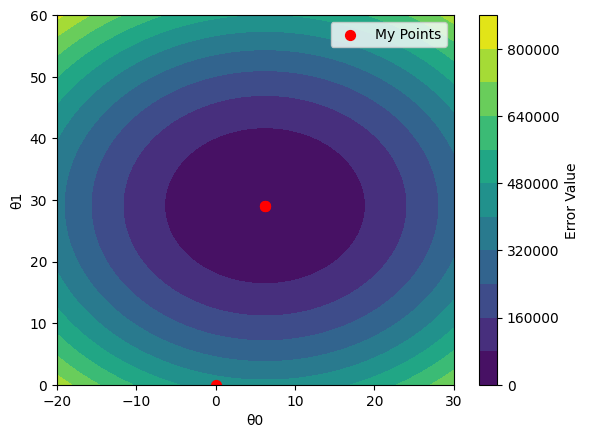

In [21]:
alpha = 1
convg_param = 1e-5
show_3d(X,Y,alpha,convg_param)
show_contor(X,Y,alpha,convg_param)

In [22]:
def gradient_descent_plot_ani(alpha,conv_param,B,Y,X,dist): 
    m = len(X)
    delta = float('inf')
    loss =  loss_fun(X,Y,B)
    cnt  = 0
    J  = [loss[0][0]]
    B0 = [0.]
    B1 = [0.]
    while abs(delta) > conv_param:
        H = hypothesis(X,B)
          
        grad = np.dot((Y.T - H).T, X) / len(X)
        B = B + alpha * grad
        
        delta = loss - loss_fun(X,Y,B) 
        loss = loss_fun(X,Y,B)
        cnt += 1
        
        if cnt%dist == 0  and len(J) < 50:  
        # if cnt%dist == 0:     
            J.append(float(loss[0][0]))
            B0.append(float(B[0][0]))  
            B1.append(float(B[0][1])) 
            
    return J, B0, B1

def show_3d_animation(X, Y, alpha, convg_param):
    plt.clf()
    B0_range = np.linspace(-20, 30, 200)
    B1_range = np.linspace(0, 60, 200)
    B0, B1 = np.meshgrid(B0_range, B1_range)

    Z = np.zeros_like(B0, dtype=float)
    for i in range(B0.shape[0]):
        for j in range(B0.shape[1]):
            Bb = np.array([[B0[i, j], B1[i, j]]])
            Z[i, j] = loss_fun(X, Y, Bb).item()

    J_points, B0_points, B1_points = gradient_descent_plot_ani(alpha, convg_param, np.zeros((1, 2)), Y, X, 1)

    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    
    
    surf = ax.plot_surface(B0, B1, Z, cmap="viridis", alpha=0.7, edgecolor="none")

   
    ax.set_xlabel("Theta 0")
    ax.set_ylabel("Theta 1")
    ax.set_zlabel("Loss")
    ax.set_title("Gradient Descent Path")
    fig.colorbar(surf, shrink=0.5, aspect=5)
    
    
    scatter = ax.scatter([], [], [], color='red', s=30, label="Loss Value")

 
    ax.legend()

    ax.view_init(elev=30, azim=45)
 
    def update(frame):
        if frame < len(B0_points):
           
            scatter._offsets3d = (B0_points[:frame+1], B1_points[:frame+1], J_points[:frame+1])
            
            ax.view_init(elev=30, azim=45 + frame/2)
        
        return scatter
    
    
    ani = FuncAnimation(fig, update, frames=len(B0_points)+20, 
                        interval=200, blit=False, repeat=False) #interval specify time delay 
    
    
    ani.save('gradient_descent_animation.gif', writer='pillow', fps=5, dpi=100)
    
    plt.show()
    
    return ani

def show_contor(X,Y,alpha,convg_param):
    plt.clf()
    B0_range = np.linspace(-20, 30, 200)
    B1_range = np.linspace(0, 60, 200)
    B0, B1 = np.meshgrid(B0_range, B1_range)


    J = np.zeros_like(B0, dtype=float)
    for i in range(B0.shape[0]):
        for j in range(B0.shape[1]):
            Bb = np.array([[B0[i, j], B1[i, j]]])
            J[i, j] = loss_fun(X, Y, Bb).item()
    dist =1
    J_points,B0_points,B1_points = gradient_descent_plot(alpha,convg_param,np.zeros((1, 2)),Y,X,dist)
    
    plt.figure()
    plt.clf()
    contour = plt.contourf(B0, B1, J, levels=10, cmap='viridis')  
    plt.colorbar(contour, label="Error Value")
    plt.scatter(B0_points, B1_points, c='red', s=50, label="My Points")

    plt.xlabel("θ0")
    plt.ylabel("θ1")
    plt.legend()
    plt.show()



In [ ]:
alpha = 0.1
convg_param = 1e-10
show_3d_animation(X,Y,alpha,convg_param)
show_contor(X,Y,alpha,convg_param)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation


def create_contour_animation(X, Y, alpha, convg_param):
    
    B0_range = np.linspace(-20, 30, 200)
    B1_range = np.linspace(0, 60, 200)
    B0, B1 = np.meshgrid(B0_range, B1_range)

    J = np.zeros_like(B0, dtype=float)
    for i in range(B0.shape[0]):
        for j in range(B0.shape[1]):
            Bb = np.array([[B0[i, j], B1[i, j]]])
            J[i, j] = loss_fun(X, Y, Bb).item()
    
    dist = 1
    J_points, B0_points, B1_points = gradient_descent_plot(alpha, convg_param, np.zeros((1, 2)), Y, X, dist)
    
    # Create figure and contour
    fig, ax = plt.subplots()
    contour = ax.contourf(B0, B1, J, levels=10, cmap='viridis')  
    plt.colorbar(contour, label="Error Value")
    
    
    scatter = ax.scatter([], [], c='red', s=50, label="Gradient Descent Path")
    ax.set_xlabel("θ0")
    ax.set_ylabel("θ1")
    ax.legend()
    
    
    def update(frame):
        
        scatter.set_offsets(np.c_[B0_points[:frame+1], B1_points[:frame+1]])
        return scatter,
    
    
    ani = FuncAnimation(fig, update, frames=len(B0_points), 
                        interval=200, blit=True, repeat=False)
    
    
    ani.save('gradient_descent_animation_contour.gif', writer='pillow', fps=5)
    
    plt.show()
    return ani


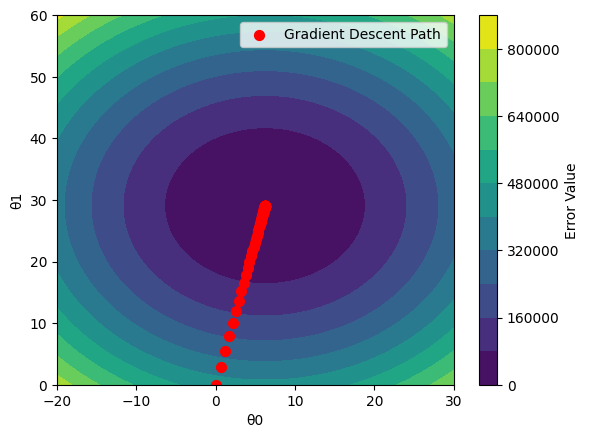

In [ ]:
alpha = 0.1
convg_param = 1e-10
create_contour_animation(X,Y,alpha,convg_param)